In [1]:
import numpy as np
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
import torch
import pickle as pkl
import matplotlib.pyplot as plt


In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='utf-8')
    return dict

In [3]:
def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of corpus words, number of corpus words)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    
    svd = TruncatedSVD(n_components=k, n_iter=n_iters)
    #Must call fit for the appropriate matrix before calling transform
    svd.fit(M)
    M_reduced = svd.transform(M)


    print("Done.")
    return M_reduced

In [4]:
def plot_embeddings(vectors, labels, plt_name="plot"):
    X = vectors[:,0]
    Y = vectors[:,1]
    fig, ax = plt.subplots()
    ax.scatter(X, Y)

    for idx,label in enumerate(labels):
        ax.annotate(label, (X[idx], Y[idx]),arrowprops=dict(facecolor='black', shrink=2))
        plt.scatter(X,Y, marker='x')
    fig.set_size_inches(18.5, 10.5, forward=True)
    plt.savefig("{}.png".format(plt_name))
    
    

## Step1 : load the weights and get the parameter of the layer

In [5]:
## load the labels
names = unpickle("../data/cifar-100-python/meta")
labels = names['fine_label_names']

In [6]:
mymodel = torch.load("out.pt")
params = mymodel.parameters()
cnt = 0
weights = []
for param in params:
    weights.append(param.data.cpu().numpy()) ## If you don't use cuda, remove .cpu()


FileNotFoundError: [Errno 2] No such file or directory: 'out.pt'

In [12]:
## Make sure your weight size is 100*100
weights[2].shape

(100, 100)

weight
 0. shape : 100 * 32*32*3
 2. shape : 100 * 100
 
the columns of the inverse of the weight are the image vectors


In [45]:
## Because our output is one hot encoded, we need to get the inverse of the matrix.
image_vector =np.linalg.inv(weights[2])

In [46]:
## to make using numpy easier, we are going to transpose the matrix. 
## now the rows are the image vector
image_vector=image_vector.transpose()

In [47]:
## might not need this but this creates a dictionary mapping each label to its image vector
vector_dict = {}
for idx, name in enumerate(labels):
    vector_dict[name] = image_vector[idx]

## STEP 2:
reduce the dimension of the vectors and plot the vectors

In [51]:
reduced_vectors = reduce_to_k_dim(image_vector)

Running Truncated SVD over 100 words...
Done.


In [3]:
plot_embeddings(reduced_vectors,labels, "basics")

NameError: name 'reduced_vectors' is not defined

In [83]:
vec_lengths=np.linalg.norm(reduced_vectors, axis=1)
normalized_vec = reduced_vectors/ vec_lengths[:,np.newaxis]

In [4]:
plot_embeddings(normalized_vec,labels, "basics_normalized")

NameError: name 'normalized_vec' is not defined

Running Truncated SVD over 100 words...
Done.


/home/irenelee5645/.local/lib/python3.7/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


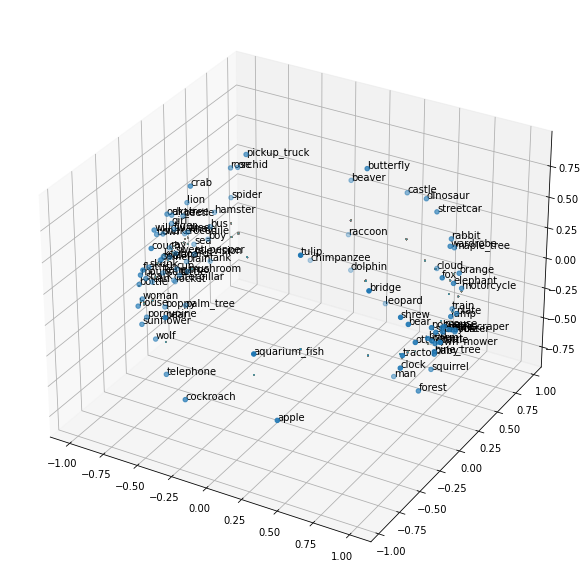

<Figure size 432x288 with 0 Axes>

In [86]:
d3_vectors = reduce_to_k_dim(image_vector, k=3)
vec_lengths=np.linalg.norm(d3_vectors, axis=1)
normalized_vec = d3_vectors/ vec_lengths[:,np.newaxis]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
vectors=normalized_vec
X = vectors[:,0]
Y = vectors[:,1]
Z = vectors[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# fig, ax = plt.subplots()
ax.scatter(X, Y,Z)

for idx,label in enumerate(labels):
    ax.text(X[idx], Y[idx],Z[idx],label)
    plt.scatter(X,Y,Z, marker='o')
fig.set_size_inches(18.5, 10.5, forward=True)

plt.show()
plt.savefig("normalized_3d_basic")